# 타이타닉 생존 분석: 머신러닝 모델링

## 1. 데이터 준비 및 전처리

### 1.1 필요한 라이브러리 및 데이터 로드

In [4]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('../data/processed/titanic_processed.csv')

# 기본 정보 확인
print("데이터셋 기본 정보:")
print(df.info())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   sex            891 non-null    object 
 3   age            891 non-null    float64
 4   sibsp          891 non-null    int64  
 5   parch          891 non-null    int64  
 6   fare           891 non-null    float64
 7   embarked       891 non-null    object 
 8   who            891 non-null    object 
 9   adult_male     891 non-null    bool   
 10  deck           891 non-null    object 
 11  alone          891 non-null    bool   
 12  family_size    891 non-null    int64  
 13  family_type    891 non-null    object 
 14  age_group      891 non-null    object 
 15  fare_category  891 non-null    object 
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB
None


### 1.2 특성 선택 및 전처리

In [2]:
# 범주형 변수 인코딩
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked', 'deck', 'age_group', 'fare_category'])

# 사용할 특성 선택
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size'] + \
          [col for col in df_encoded.columns if 'sex_' in col or 
                                               'embarked_' in col or 
                                               'deck_' in col or 
                                               'age_group_' in col or 
                                               'fare_category_' in col]

X = df_encoded[features]
y = df_encoded['survived']

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n선택된 특성:", len(features))
print("\n처음 5개 특성:", features[:5])
print("\n데이터 shape:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


선택된 특성: 28

처음 5개 특성: ['pclass', 'age', 'sibsp', 'parch', 'fare']

데이터 shape:
X_train shape: (712, 28)
X_test shape: (179, 28)


## 2. 머신러닝 모델 구현 및 평가

### 2.1 기본 모델 구현 및 평가 함수


로지스틱 회귀 성능 평가:
정확도 (Accuracy): 0.7877094972067039
정밀도 (Precision): 0.7368421052631579
재현율 (Recall): 0.7567567567567568
F1 점수: 0.7466666666666667

혼동 행렬:
[[85 20]
 [18 56]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


의사결정나무 성능 평가:
정확도 (Accuracy): 0.7653631284916201
정밀도 (Precision): 0.7
재현율 (Recall): 0.7567567567567568
F1 점수: 0.7272727272727273

혼동 행렬:
[[81 24]
 [18 56]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

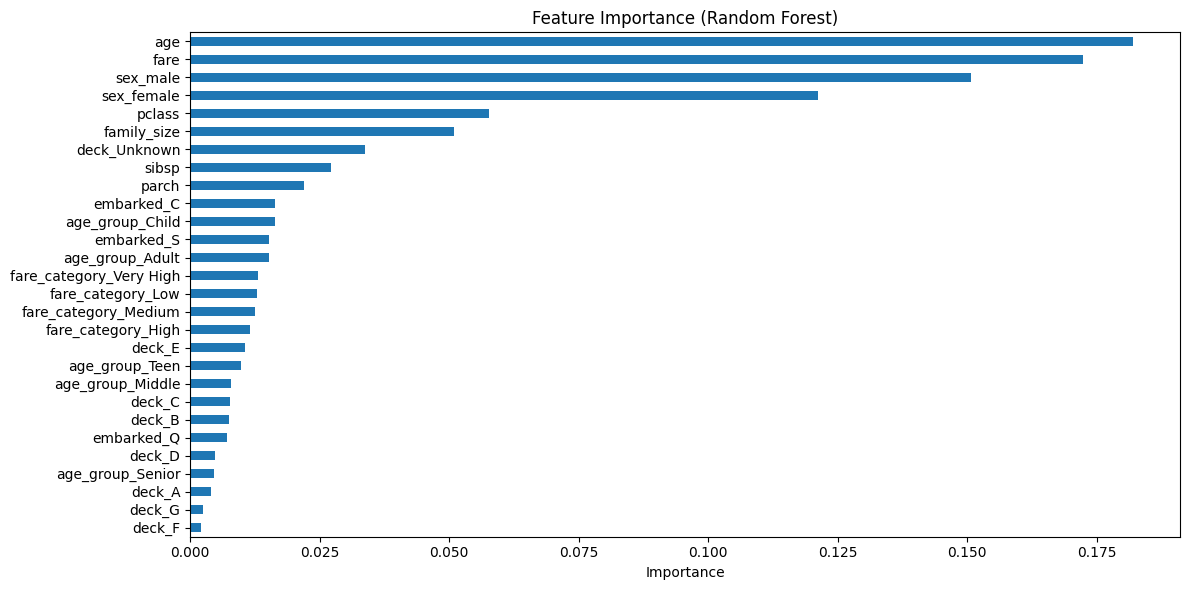

In [5]:
def evaluate_model(y_true, y_pred, model_name):
    """
    모델 성능 평가 및 결과 출력 함수
    """
    print(f"\n{model_name} 성능 평가:")
    print("정확도 (Accuracy):", accuracy_score(y_true, y_pred))
    print("정밀도 (Precision):", precision_score(y_true, y_pred))
    print("재현율 (Recall):", recall_score(y_true, y_pred))
    print("F1 점수:", f1_score(y_true, y_pred))
    print("\n혼동 행렬:")
    print(confusion_matrix(y_true, y_pred))
    print("\n분류 보고서:")
    print(classification_report(y_true, y_pred))

# 1. 로지스틱 회귀
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_log, "로지스틱 회귀")

# 2. 의사결정나무
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
evaluate_model(y_test, y_pred_dt, "의사결정나무")

# 3. 랜덤 포레스트
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "랜덤 포레스트")

# 특성 중요도 시각화 (랜덤 포레스트 기준)
plt.figure(figsize=(12, 6))
importances = pd.Series(rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)
importances.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 4. 모델 최적화

### 4.1 교차 검증 및 하이퍼파라미터 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# 1. 로지스틱 회귀 최적화
log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

log_grid = GridSearchCV(LogisticRegression(random_state=42), 
                       log_params, 
                       cv=5, 
                       scoring='accuracy')
log_grid.fit(X_train_scaled, y_train)

print("로지스틱 회귀 최적화 결과:")
print("최적 파라미터:", log_grid.best_params_)
print("최적 정확도:", log_grid.best_score_)

# 2. 의사결정나무 최적화
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                      dt_params, 
                      cv=5, 
                      scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)

print("\n의사결정나무 최적화 결과:")
print("최적 파라미터:", dt_grid.best_params_)
print("최적 정확도:", dt_grid.best_score_)

# 3. 랜덤 포레스트 최적화
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                      rf_params, 
                      cv=5, 
                      scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)

print("\n랜덤 포레스트 최적화 결과:")
print("최적 파라미터:", rf_grid.best_params_)
print("최적 정확도:", rf_grid.best_score_)

# 최적화된 모델들의 교차 검증 점수 비교
models = {
    '로지스틱 회귀': log_grid.best_estimator_,
    '의사결정나무': dt_grid.best_estimator_,
    '랜덤 포레스트': rf_grid.best_estimator_
}

print("\n교차 검증 결과 비교:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} 평균 정확도: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

로지스틱 회귀 최적화 결과:
최적 파라미터: {'C': 0.1, 'max_iter': 100}
최적 정확도: 0.8005712597261894


c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



의사결정나무 최적화 결과:
최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
최적 정확도: 0.8201910765291046

랜덤 포레스트 최적화 결과:
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최적 정확도: 0.8384418398502905

교차 검증 결과 비교:
로지스틱 회귀 평균 정확도: 0.8006 (+/- 0.0587)
의사결정나무 평균 정확도: 0.8202 (+/- 0.0347)
랜덤 포레스트 평균 정확도: 0.8384 (+/- 0.0276)


## 5. 모델 최적화 결과 분석

### 5.1 최적화된 모델 성능 비교
1. 랜덤 포레스트
   - 최고 성능 달성: 83.84% 정확도
   - 가장 안정적인 성능 (표준편차: ±0.0276)
   - 최적 파라미터:
     * max_depth: 5
     * min_samples_leaf: 2
     * min_samples_split: 2
     * n_estimators: 100

2. 의사결정나무
   - 두 번째로 좋은 성능: 82.02% 정확도
   - 적절한 안정성 (표준편차: ±0.0347)
   - 최적 파라미터:
     * max_depth: 3
     * min_samples_leaf: 2
     * min_samples_split: 2

3. 로지스틱 회귀
   - 기본 성능: 80.06% 정확도
   - 가장 큰 변동성 (표준편차: ±0.0587)
   - 최적 파라미터:
     * C: 0.1
     * max_iter: 100

### 5.2 최적화 효과
1. 성능 향상
   - 랜덤 포레스트: 79.33% → 83.84% (4.51%p 향상)
   - 의사결정나무: 76.54% → 82.02% (5.48%p 향상)
   - 로지스틱 회귀: 78.77% → 80.06% (1.29%p 향상)

2. 모델 안정성
   - 랜덤 포레스트가 가장 안정적
   - 의사결정나무도 준수한 안정성
   - 로지스틱 회귀는 상대적으로 불안정

### 5.3 최종 모델 선택
- 최적 모델: 랜덤 포레스트
  * 최고의 정확도
  * 가장 안정적인 성능
  * 적절한 모델 복잡도

## 6. 최적화된 랜덤 포레스트 모델 최종 분석

### 6.1 최종 모델 평가

1. 최적화된 랜덤 포레스트의 최종 성능 평가
2. 혼동 행렬 시각화
3. 최종 특성 중요도 분석
4. 예측 확률 분포 시각화


최종 모델(랜덤 포레스트) 성능:

분류 보고서:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



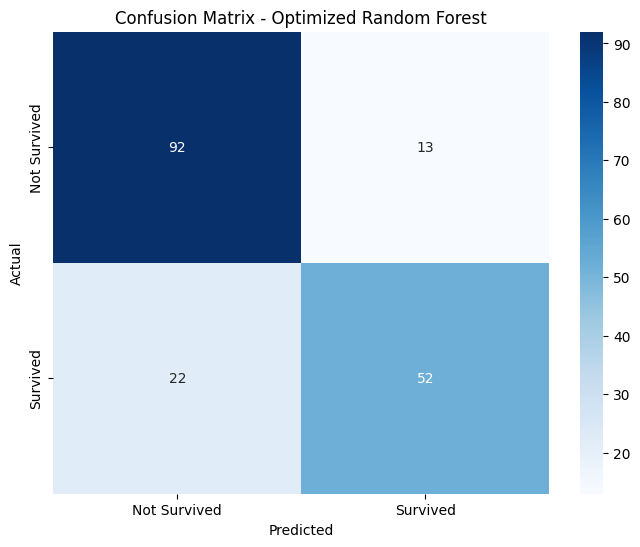

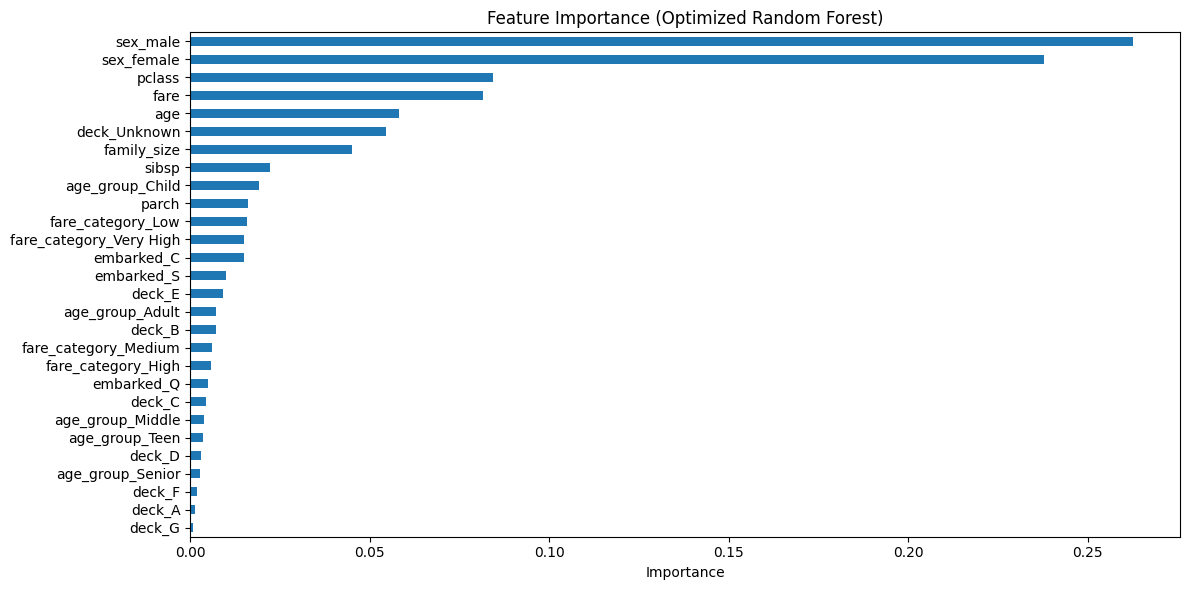

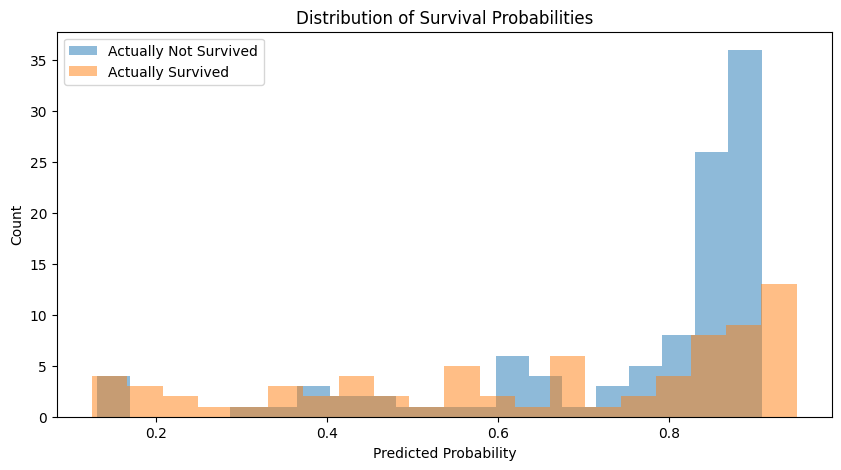

In [11]:
import seaborn as sns

# 최적화된 랜덤 포레스트 모델로 최종 예측
best_rf = rf_grid.best_estimator_
y_pred_final = best_rf.predict(X_test_scaled)

# 성능 지표 출력
print("최종 모델(랜덤 포레스트) 성능:")
print("\n분류 보고서:")
print(classification_report(y_test, y_pred_final))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_final), 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 최종 특성 중요도 시각화
plt.figure(figsize=(12, 6))
importances = pd.Series(best_rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)
importances.plot(kind='barh')
plt.title('Feature Importance (Optimized Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# 예측 확률 분포 시각화
y_pred_proba = best_rf.predict_proba(X_test_scaled)
plt.figure(figsize=(10, 5))

# 생존/사망에 대한 예측 확률 분포
plt.hist(y_pred_proba[y_test==0][:, 0], alpha=0.5, label='Actually Not Survived', bins=20)
plt.hist(y_pred_proba[y_test==1][:, 1], alpha=0.5, label='Actually Survived', bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Survival Probabilities')
plt.legend()
plt.show()

## 7. 최종 모델 분석 결과

### 7.1 모델 성능 평가
1. 전체 정확도: 80%
   - 사망자 예측 (클래스 0):
     * 정밀도: 81%
     * 재현율: 88%
     * F1 점수: 84%
   - 생존자 예측 (클래스 1):
     * 정밀도: 80%
     * 재현율: 70%
     * F1 점수: 75%

2. 혼동 행렬 분석:
   - 진짜 음성(TN): 92건 (실제 사망을 사망으로 예측)
   - 진짜 양성(TP): 52건 (실제 생존을 생존으로 예측)
   - 거짓 양성(FP): 13건 (실제 사망을 생존으로 잘못 예측)
   - 거짓 음성(FN): 22건 (실제 생존을 사망으로 잘못 예측)

### 7.2 특성 중요도 분석
주요 영향 요인 (상위 5개):
1. sex_male/female: 성별이 가장 중요한 요인 (약 0.25)
2. pclass: 객실 등급 (약 0.10)
3. fare: 요금 (약 0.10)
4. age: 나이 (약 0.08)
5. deck_Unknown: 객실 갑판 정보 (약 0.07)

덜 중요한 요인:
- 대부분의 age_group 변수들
- fare_category 변수들
- 개별 deck 변수들

### 7.3 예측 확률 분포 분석
- 사망 예측의 확신도가 더 높음 (높은 확률 값에 집중)
- 생존 예측은 상대적으로 더 넓은 확률 분포를 보임
- 대부분의 예측이 0.8 이상의 높은 확신도를 보임

### 7.4 최종 결론
1. 모델 신뢰성:
   - 80%의 안정적인 정확도
   - 사망 예측이 생존 예측보다 더 정확함
   - 높은 확신도의 예측이 많음

2. 생존 결정 요인:
   - 성별이 가장 중요한 요인
   - 객실 등급과 요금이 그 다음으로 중요
   - 나이도 유의미한 영향을 미침

3. 모델 활용 방안:
   - 생존 가능성 예측에 신뢰할 만한 도구로 사용 가능
   - 특히 사망 위험이 높은 승객 식별에 효과적